# Wage prediction

------------------
# 4. Knn Regressor

## 모듈

In [1]:
import os
import sys
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
from time import sleep

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#그래프 폰트 전역 설정
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'calibri'
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize']   = 20
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams["legend.frameon"] = True
mpl.rcParams["legend.facecolor"] = 'white'

In [2]:
from sklearn.neighbors import KNeighborsRegressor

In [3]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid  #그냥 조합해서 dictionary만 리턴??
from sklearn.model_selection import RandomizedSearchCV #분포에서 n번 랜덤샘플링해서 조합

## 데이터 불러오기

In [5]:
fifa = pd.read_excel('fifa_wage_prediction.xlsx')

https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py

- Linear Regression 과 비교해보자

Text(0, 0.5, 'Wage')

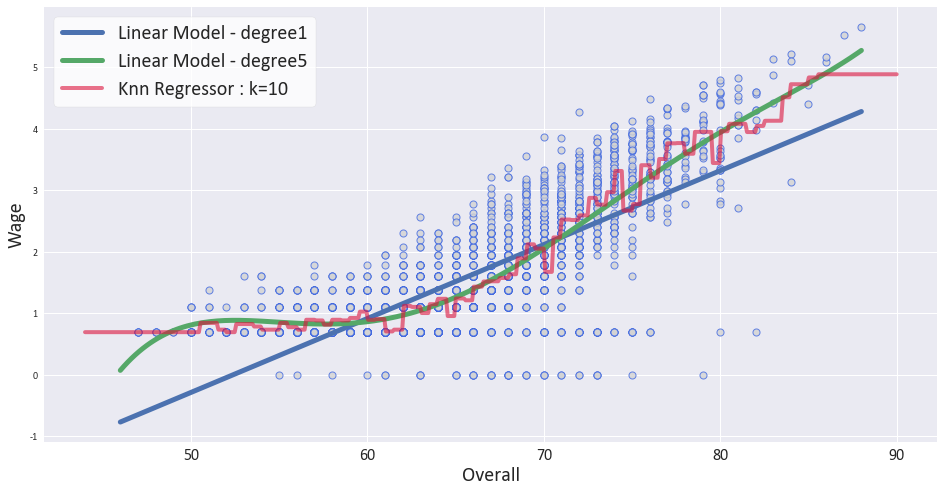

In [93]:
from sklearn.linear_model import LinearRegression

X = fifa.Overall.to_numpy().reshape(-1,1)
y = np.log1p(fifa.Wage)
#y = fifa.Wage

plt.figure(figsize=(16,8))
plt.scatter(X,y, alpha=0.8, s=50, 
            edgecolor='royalblue',color='lightgrey', linewidth=1)

### Linear Regression
degree = [1,5]
for i in degree:
    poly = PolynomialFeatures(degree = i, include_bias=False)
    X_pol = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_pol,y)

    line = np.linspace(46,88,200)[:, np.newaxis]
    plt.plot(line, model.predict(poly.fit_transform(line)),
             label ='Linear Model - degree'+str(i),
             linewidth=5, alpha=1)

### Knn Regressor
n_neighbors = 10
model = KNeighborsRegressor( n_neighbors = n_neighbors)
model.fit(X,y)
line = np.linspace(44,90,500).reshape(-1,1)
plt.plot(line, model.predict(line), label = 'Knn Regressor : k=' + str(n_neighbors),
         linewidth=4, alpha = 0.6, color='crimson')
    
    
plt.legend(fontsize=20)
plt.xlabel("Overall")
plt.ylabel("Wage")

- K에 따른 예측값의 차이를 확인해보자

Text(0, 0.5, 'Wage')

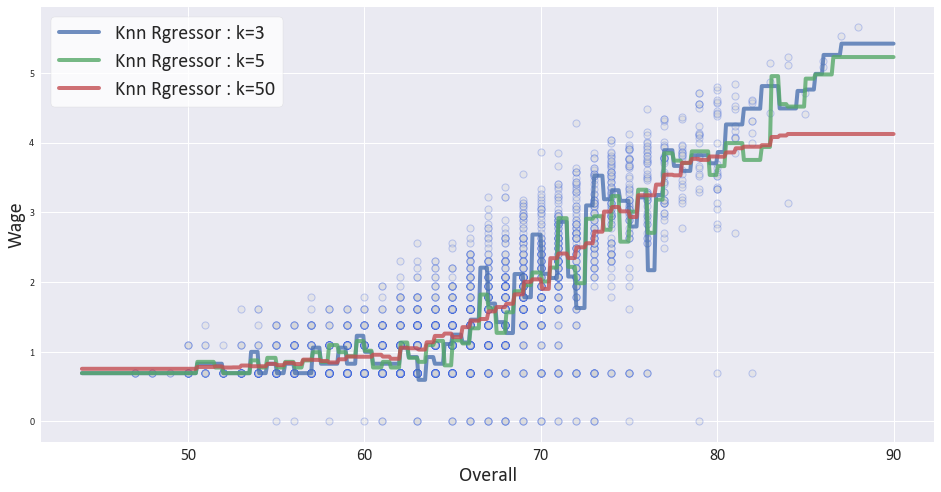

In [138]:
X = fifa.Overall.to_numpy().reshape(-1,1)
y = np.log1p(fifa.Wage)
#y = fifa.Wage

plt.figure(figsize=(16,8))
plt.scatter(X,y, alpha=0.3, s=50, edgecolor='royalblue',color='lightgrey', linewidth=1)

n_neighbors = [3,5,50]
for i in n_neighbors:

    model = KNeighborsRegressor( n_neighbors = i )
    model.fit(X,y)
    line = np.linspace(44,90,500).reshape(-1,1)
    plt.plot(line, model.predict(line), label = 'Knn Rgressor : k=' + str(i),
             linewidth=4, alpha = 0.8)

plt.legend(fontsize=20)
plt.xlabel("Overall")
plt.ylabel("Wage")


- weights parameter를 조절해보자
    - `uniform` : 이웃(k)에 속하면 같은 가중치 부여
    - `distance` : 가까울 수록 가중치 부여

Text(0, 0.5, 'Wage')

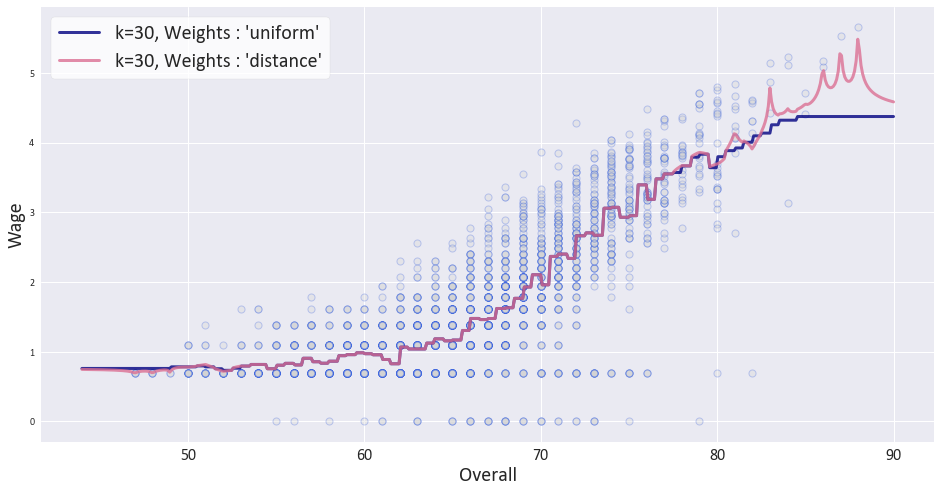

In [156]:
X = fifa.Overall.to_numpy().reshape(-1,1)
y = np.log1p(fifa.Wage)
#y = fifa.Wage

plt.figure(figsize=(16,8))
plt.scatter(X,y, alpha=0.3, s=50, edgecolor='royalblue',color='lightgrey', linewidth=1)

weights = ['uniform', 'distance']
color = ['navy', 'palevioletred']

for i, weights in enumerate(weights):

    model = KNeighborsRegressor( n_neighbors = 30, weights = weights )
    model.fit(X,y)
    line = np.linspace(44,90,500).reshape(-1,1)
    plt.plot(line, model.predict(line), label = 'k=30, Weights : \'{0}\''.format(str(weights)) , 
             linewidth=3, alpha = 0.8, color = color[i])

plt.legend(fontsize=20)
plt.xlabel("Overall")
plt.ylabel("Wage")

-------------------

In [157]:
df = pd.read_csv('train_prep.csv')
df.head()

,Wage,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,def_hi,def_low,def_mid,off_hi,off_low,off_mid,body_lean,body_normal,body_stocky,num2cat
0,17,1.890241,1.897314,0.504524,0.596244,0.924429,0.824673,0.510466,1.609366,0.829636,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
1,8,0.557477,-0.136560,0.842159,-0.025075,-0.913213,0.217403,-1.464705,0.567594,-0.905227,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
2,5,-1.041841,-0.645029,-0.846018,0.285585,1.175017,-0.632776,0.151344,0.247049,0.395921,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,7,-0.775288,1.388846,-0.677200,-0.025075,-1.581446,0.824673,-0.028217,-0.233769,-0.905227,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
4,9,-1.041841,-0.136560,0.673341,-0.025075,-1.080271,-0.389868,-0.926022,-1.676223,-0.182367,...,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0


In [158]:
X_train = df.iloc[:,1:]
X_train = X_train.drop(['def_mid', 'off_mid' ,'body_normal'], axis='columns')
X_train.head()

,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,International Reputation,Weak Foot,Skill Moves,def_hi,def_low,off_hi,off_low,body_lean,body_stocky,num2cat
0,1.890241,1.897314,0.504524,0.596244,0.924429,0.824673,0.510466,1.609366,0.829636,1.042222,...,-1.0,0.5,-0.333333,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0.557477,-0.136560,0.842159,-0.025075,-0.913213,0.217403,-1.464705,0.567594,-0.905227,-2.095652,...,-1.0,0.0,-1.000000,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0
2,-1.041841,-0.645029,-0.846018,0.285585,1.175017,-0.632776,0.151344,0.247049,0.395921,-0.762055,...,-1.0,0.5,-0.333333,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
3,-0.775288,1.388846,-0.677200,-0.025075,-1.581446,0.824673,-0.028217,-0.233769,-0.905227,0.257754,...,-1.0,0.0,-1.000000,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
4,-1.041841,-0.136560,0.673341,-0.025075,-1.080271,-0.389868,-0.926022,-1.676223,-0.182367,0.885329,...,-1.0,-0.5,-0.333333,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [159]:
y = df.Wage
y.head()

0    17
1     8
2     5
3     7
4     9
Name: Wage, dtype: int64

# Model Fitting

# KNN regressor
- 시간이 오래걸린다는 단점?
- 단순히 모든 데이터를 기억해서 계산

knn regression parameters

- n_neigbors (default=5)
- weights :
    - uniform (default)
    - distance (거리에 따라 가중치)

In [160]:
# cross validation setting - 원하는 옵션 선택

random = np.random.randint(1,1000,1)[0]
kfold            = KFold(n_splits=10, shuffle=True, random_state=1)
repeated_kfold   = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
stratified_kfold = StratifiedKFold(n_splits=2, random_state=1)

In [161]:
# model
knn = KNeighborsRegressor( )
knn = TransformedTargetRegressor(regressor = knn,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function

In [162]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'distance'}

In [150]:
model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

- 먼저 knn의 k만 조절해보자

In [167]:
model = knn
X = X_train 
y = df.Wage

num_list = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,50]

param_grid = {'regressor__n_neighbors' : num_list,
              'regressor__weights' : ['uniform']}
grid_search = GridSearchCV(model, param_grid, cv=repeated_kfold, 
                           return_train_score=True,
                           scoring = ('neg_mean_squared_error'))
grid_search.fit(X, y)      # fit 해야 결과가 나옴

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=1),
             error_score=nan,
             estimator=TransformedTargetRegressor(check_inverse=True,
                                                  func=<ufunc 'log1p'>,
                                                  inverse_func=<ufunc 'exp'>,
                                                  regressor=KNeighborsRegressor(algorithm='auto',
                                                                                leaf_size=30,
                                                                                metric='minkowski',
                                                                                metric_params=None,
                                                                                n_jobs=None,
                                                                                n_neighbors=5,
                                                                                p=2,
             

In [168]:
print('Best Score :',grid_search.best_score_)
print('Best Param :',grid_search.best_params_)

Best Score : -319.6824756692714
Best Param : {'regressor__n_neighbors': 2, 'regressor__weights': 'uniform'}


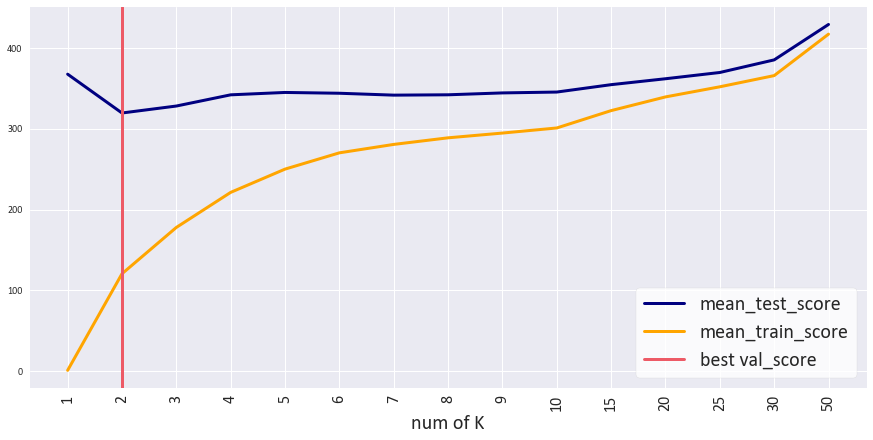

In [169]:
gs = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15,7))
plt.plot(-gs.mean_test_score, data = gs, color='navy')
plt.plot(-gs.mean_train_score, data = gs, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

plt.xticks(np.arange(len(param_grid['regressor__n_neighbors'])),  labels = param_grid['regressor__n_neighbors'],
           rotation=90)

plt.legend(fontsize=20)
plt.xlabel('num of K')
plt.show()

- weights = distace로 설정하고 진행해보자

In [170]:
model = knn
X = X_train 
y = df.Wage

num_list = [1,2,3,4,5,6,7,8,9,10,15]

param_grid = {'regressor__n_neighbors' : num_list,
              'regressor__weights': ['distance']} 
grid_search = GridSearchCV(model, param_grid, cv=repeated_kfold, 
                           return_train_score=True,
                           scoring = ('neg_mean_squared_error'))
grid_search.fit(X, y)      # fit 해야 결과가 나옴

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=1),
             error_score=nan,
             estimator=TransformedTargetRegressor(check_inverse=True,
                                                  func=<ufunc 'log1p'>,
                                                  inverse_func=<ufunc 'exp'>,
                                                  regressor=KNeighborsRegressor(algorithm='auto',
                                                                                leaf_size=30,
                                                                                metric='minkowski',
                                                                                metric_params=None,
                                                                                n_jobs=None,
                                                                                n_neighbors=5,
                                                                                p=2,
             

In [171]:
print('Best Score :',grid_search.best_score_)
print('Best Param :',grid_search.best_params_)

Best Score : -318.5772956944448
Best Param : {'regressor__n_neighbors': 2, 'regressor__weights': 'distance'}


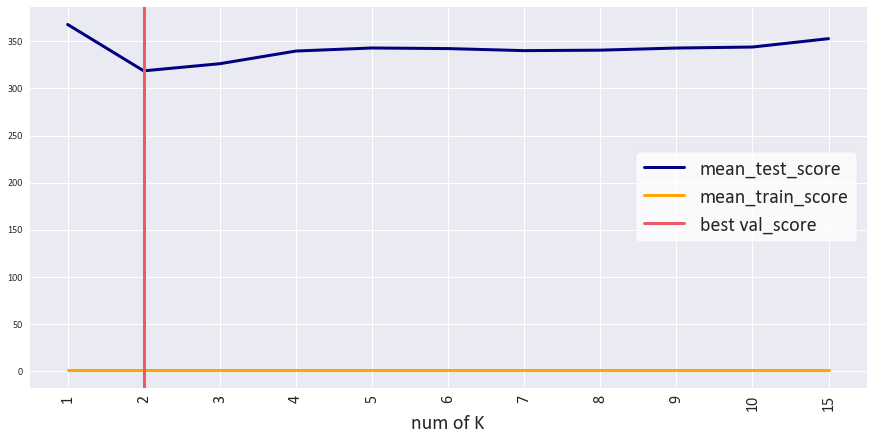

In [174]:
gs = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15,7))
plt.plot(-gs.mean_test_score, data = gs, color='navy')
plt.plot(-gs.mean_train_score, data = gs, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

plt.xticks(np.arange(len(param_grid['regressor__n_neighbors'])),  labels = param_grid['regressor__n_neighbors'],
           rotation=90)

plt.legend(fontsize=20)
plt.xlabel('num of K')
plt.show()

- grid search를 통해 찾은 bset parameter를 설정해준다

In [185]:
# model
knn = KNeighborsRegressor(n_neighbors=2, weights='distance')
knn = TransformedTargetRegressor(regressor = knn,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function

In [187]:
#knn
model = knn
X = X_train
y = df.Wage

knn_val_score = cross_validate(model, X, y, cv = repeated_kfold,
                                      scoring = ('neg_mean_squared_error','r2') ,
                                      return_train_score = True)

score = knn_val_score
print('Train R2  : {}'.format(score['train_r2'].mean()))
print('Test  R2  : {}'.format(score['test_r2'].mean()))
print('Train MSE : {}'.format(-score['train_neg_mean_squared_error'].mean()))
print('Test  MSE : {}'.format(-score['test_neg_mean_squared_error'].mean()))

Train R2  : 0.9984448304429036
Test  R2  : 0.46384933142591345
Train MSE : 0.9999999999999996
Test  MSE : 318.5772956944448


In [188]:
model

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log1p'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor(algorithm='auto',
                                                         leaf_size=30,
                                                         metric='minkowski',
                                                         metric_params=None,
                                                         n_jobs=None,
                                                         n_neighbors=2, p=2,
                                                         weights='distance'),
                           transformer=None)